# Нейронные сети

## Задание

1. Постройте нейронную сеть из одного нейрона и обучите её на датасетах nn_0.csv и nn_1.csv. Насколько отличается результат обучения и почему? Сколько потребовалось эпох для обучения? Попробуйте различные функции активации и оптимизаторы. 
2. Модифицируйте нейронную сеть из пункта 1 так, чтобы достичь минимальной ошибки на датасете nn_1.csv. Почему были сделаны именно такие изменения?
3. Создайте классификатор на базе нейронной сети для набора данных MNIST (так же можно загрузить с помощью torchvision.datasets.MNIST, tensorflow.keras.datasets.mnist.load_data и пр.). Оцените качество классификации.


##### Постройте нейронную сеть из одного нейрона и обучите её на датасетах nn_0.csv и nn_1.csv.

In [10]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm

In [11]:
def load_nn_data(number):
    nn = pd.read_csv(f'nn_{number}.csv', sep=',').to_numpy()
    X = nn[:,:-1]
    y = nn[:, -1]
    X = X.astype('float')
    y = y.astype('int')
    y[y == -1] = 0
    y[y == 1] = 1
    return X, y, nn

In [12]:
X1, Y1, nn0 = load_nn_data(0)

In [13]:
X2, Y2, nn1 = load_nn_data(1)

In [ ]:
def plot_nn(nn):
    plt.figure(figsize=(6, 6))
    legend = ('class -1', 'class 1')

# разделим фичи относящиеся к -1 и 1 классам
    X1 = nn[nn[:, 2] == -1]
    X2 = nn[nn[:, 2] == 1]

    plt.scatter(X1[:, 0], X1[:, 1])
    plt.scatter(X2[:, 0], X2[:, 1])

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend(legend)
    plt.grid(True)
    plt.show()

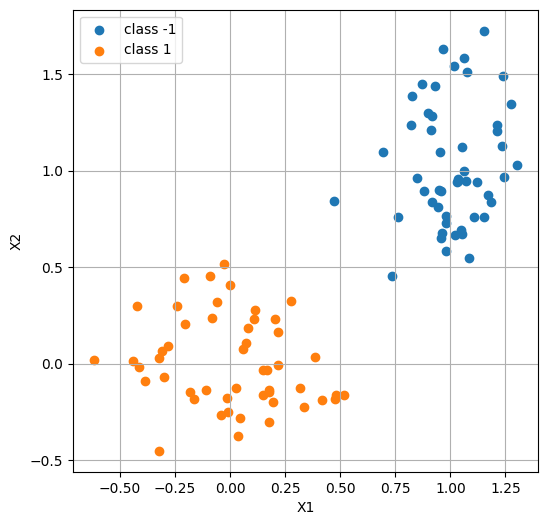

In [15]:
plot_nn(nn0)

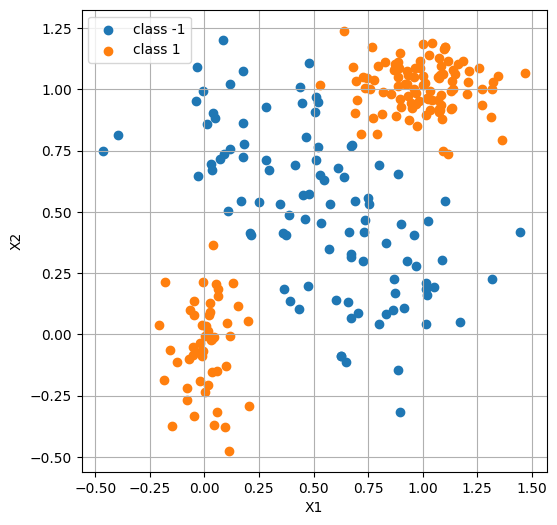

In [16]:
plot_nn(nn1)

In [17]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, Y1, test_size=0.15)

##### Насколько отличается результат обучения и почему? Сколько потребовалось эпох для обучения?

 ##### Activation funcs
 - <b>relu (Rectified Linear Unit)</b>  - функция, которая возвращает входное значение, если оно положительное, и 0, если оно отрицательное;
 - <b>exponential</b>  - функция, которая возвращает экспоненту входного значения;
 - <b>elu (Exponential Linear Unit)</b>  - функция, которая возвращает входное значение, если оно положительное, и экспоненту от входного значения минус 1, если оно отрицательное;
 - <b>selu (Scaled Exponential Linear Unit)</b>  - функция, которая является вариацией функции elu, но с масштабированием для сохранения нулевой средней и единичной дисперсии;
 - <b>tanh (гиперболический тангенс)</b>  - функция, которая возвращает значения в диапазоне от -1 до 1;
 - <b>softsign</b>  - функция, которая нормализует входное значение, деления его на абсолютное значение плюс 1;
 - <b>softplus</b> </b>  - функция, которая возвращает логарифм суммы единицы и экспоненты от входного значения;
 - <b>softmax</b>  - функция, которая нормализует входное значение, преобразуя его в вероятности для каждого класса в многоклассовой задаче;
 - <b>sigmoid </b> - функция, которая возвращает значение между 0 и 1, используемое для бинарной классификации.

##### Optimizers
 - <b>RMSprop</b> - алгоритм оптимизации, который адаптивно изменяет скорость обучения для каждого  параметра в отдельности в зависимости от среднеквадратичного градиента;
 - <b>Adadelta</b> - адаптивный алгоритм оптимизации, который использует скользящее среднее градиента для адаптации скорости обучения;
 - <b>Adam</b> - адаптивный алгоритм оптимизации, который комбинирует метод градиентного спуска со средними моментами градиента для более быстрого и стабильного обучения;
 - <b>Adagrad</b> - адаптивный алгоритм оптимизации, который изменяет скорость обучения для каждого параметра в зависимости от истории градиента;
 - <b>Adamax</b> - расширение алгоритма Adam, которое использует бесконечные нормы вместо обычных $L^2$-норм;
 - <b>FTRL</b> - оптимизатор, который использует комбинацию градиентного спуска и метода Follow-the-regularized-leader для более быстрого и точного обучения;
 - <b>NAdam</b> - расширение алгоритма Adam, которое использует метод Nesterov momentum для ускорения сходимости;
 - <b>SGD</b> - стохастический градиентный спуск, который обновляет параметры на основе градиента одного примера или небольшой группы примеров в каждый момент времени.


In [18]:
activations = ('relu', 'exponential', 'elu', 'selu', 'tanh', 'softsign','softplus', 'sigmoid')

optimizers = ('SGD','RMSprop', 'Adagrad', 'Adam', 'Adamax', 'FTRL', 'Adadelta')

Вычисляем точности предсказаний для каждого количества эпох для всех функций активации.

In [19]:
# задаем количество эпох
epochs_arr = [10, 100, 500]

In [20]:
def calculate_accuraies_of_epochs_and_activations(X_train, X_test, y_train, y_test):
    # массив accuracies для разных эпох
    pred_accuracies = [[] for i in epochs_arr]

    for epoch, i in zip(epochs_arr, range(len(epochs_arr))):
        for activation in tqdm(activations):
            # определяем модель нейронной сети с 1 входным слоем из 2 нейронов
            # и dense полносвязным слоем с 1 нейроном
            model = keras.Sequential([
                keras.layers.Dense(1, input_shape=[2], activation=activation),
            ])

            # categorical_crossentropy, binary_crossentropy
            model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
            accs_temp = np.array([])

            model.fit(X_train, y_train, epochs=epoch, verbose=0)
            loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)
            pred_accuracies[i].append(test_acc)
    
    return pred_accuracies    

In [21]:
pred_accuracies_nn_0 = calculate_accuraies_of_epochs_and_activations(X_train_1, X_test_1, y_train_1, y_test_1)

 50%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                                               | 4/8 [00:03<00:02,  1.33it/s]

 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                       | 5/8 [00:03<00:02,  1.35it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:36<00:00,  4.51s/it]


In [22]:
def plot_bars_accuracies_for_every_epoch(bars_titles, pred_accuracies, epochs_arr):
    fig, axes = plt.subplots(len(epochs_arr), 1)
    fig.set_size_inches((15, 12))

    plt.subplots_adjust(top=2)

    for epoch, ax, pred_acc in zip(epochs_arr, axes.flatten(), pred_accuracies):
        ax.bar(bars_titles, pred_acc, zorder=3, width=0.5)
        ax.yaxis.grid(zorder=0)
        ax.set_title('Epochs = %d' % epoch)
        
    for acc_arr in pred_accuracies:
        for j in range(len(acc_arr)):
            print(bars_titles[j], acc_arr[j], '\n')
    plt.show()

Строим графики точности для различных функций активации для разных количеств эпох.

relu 0.6000000238418579 

exponential 0.6000000238418579 

elu 0.4000000059604645 

selu 0.800000011920929 

tanh 0.800000011920929 

softsign 0.4000000059604645 

softplus 0.8666666746139526 

sigmoid 0.6000000238418579 

relu 1.0 

exponential 1.0 

elu 1.0 

selu 0.9333333373069763 

tanh 1.0 

softsign 0.6000000238418579 

softplus 1.0 

sigmoid 0.6666666865348816 

relu 1.0 

exponential 1.0 

elu 1.0 

selu 0.6000000238418579 

tanh 1.0 

softsign 1.0 

softplus 1.0 

sigmoid 1.0 



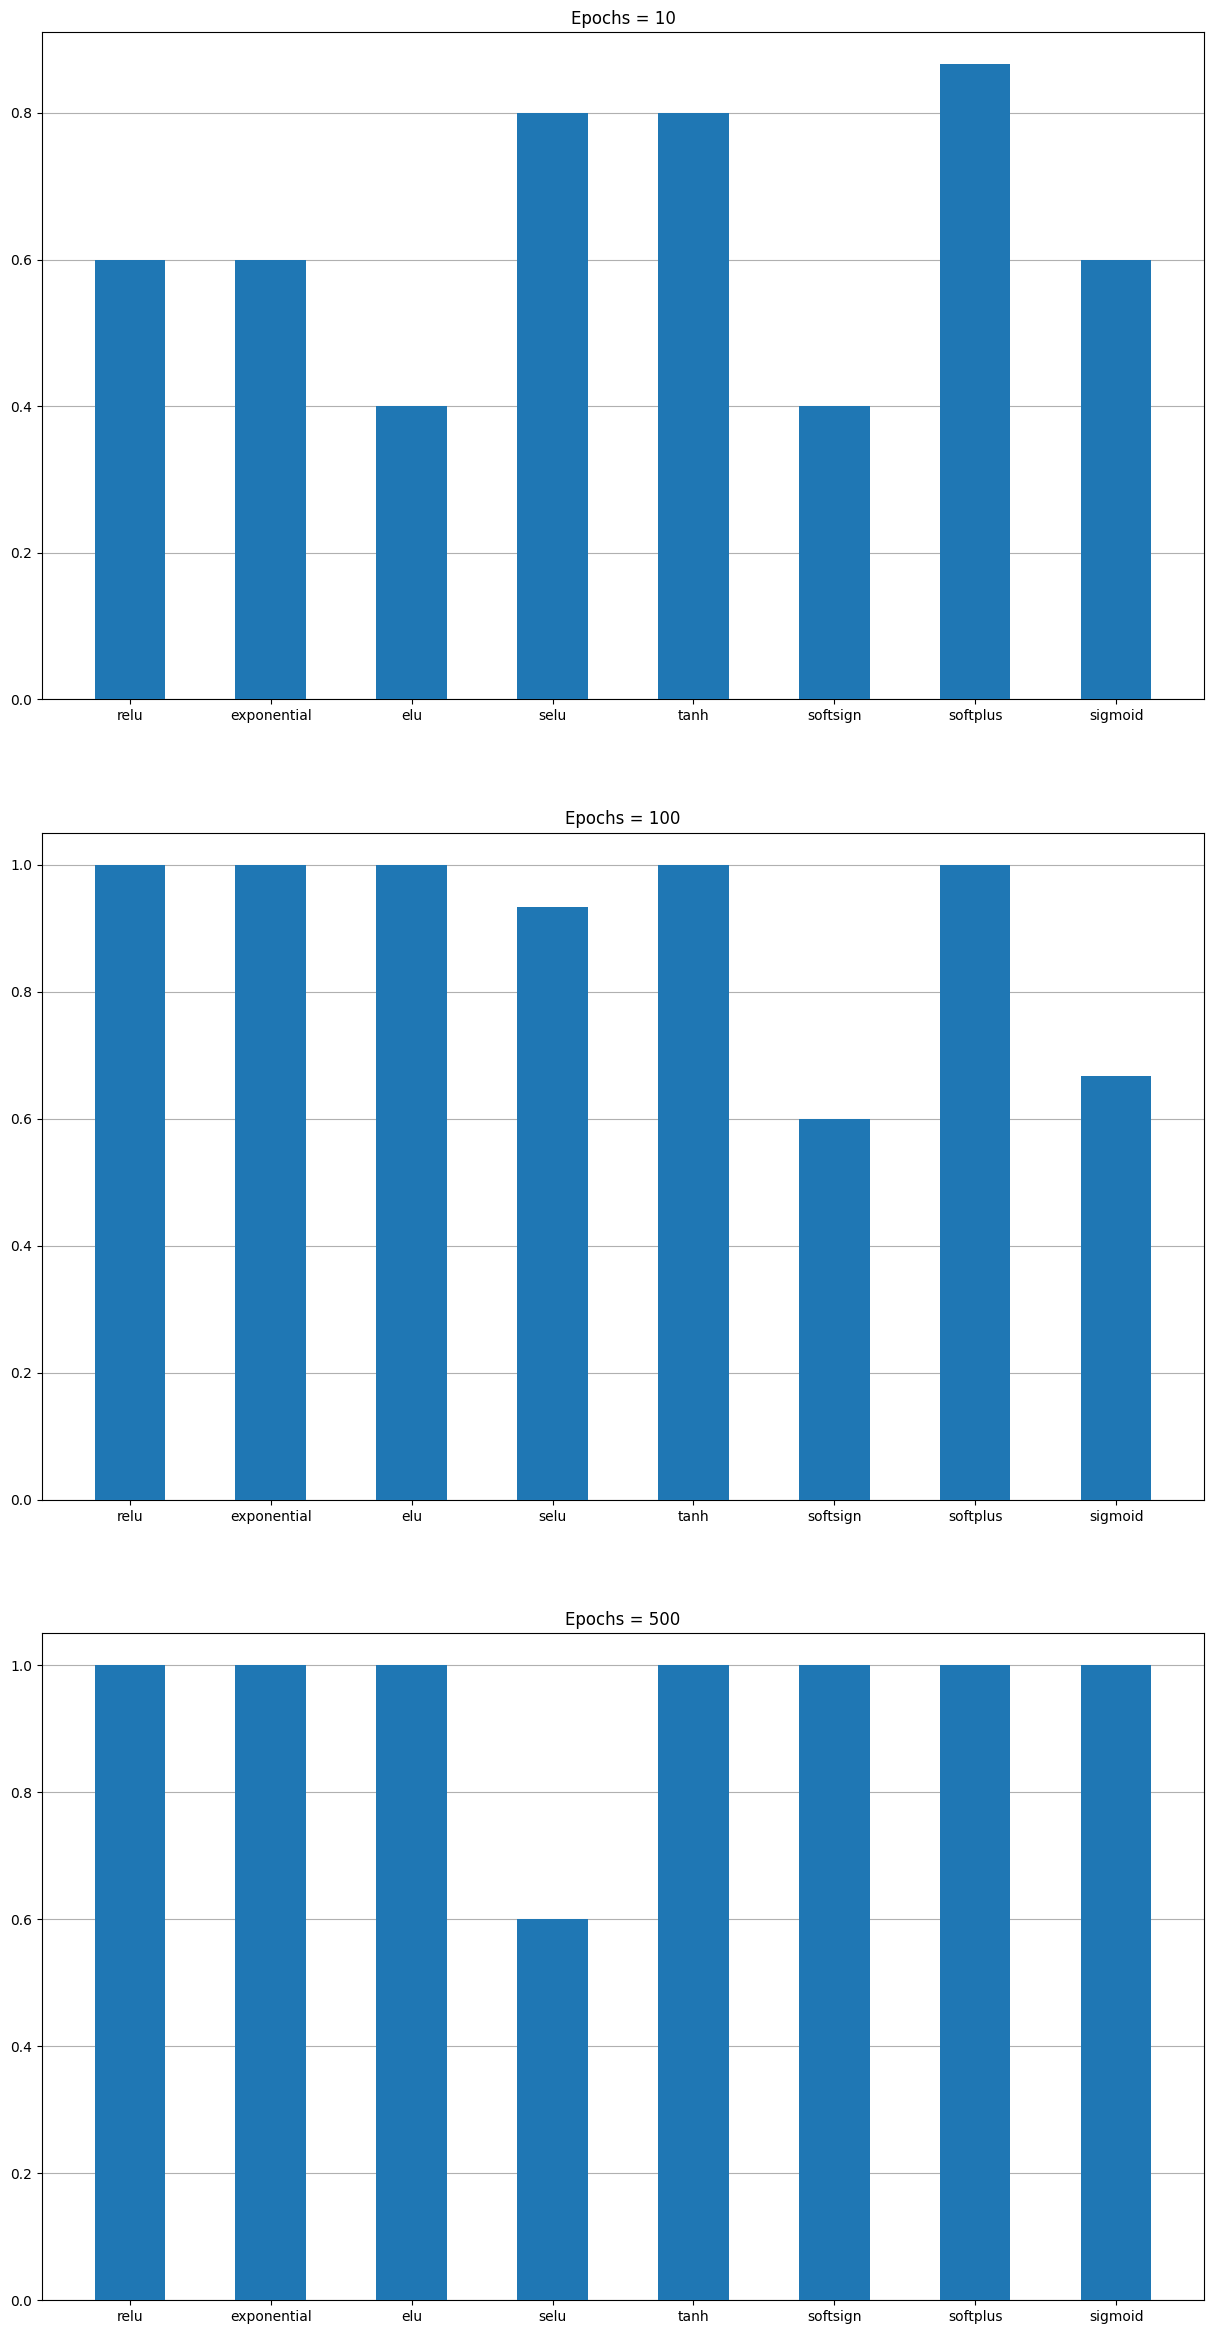

In [23]:
plot_bars_accuracies_for_every_epoch(activations, pred_accuracies_nn_0, epochs_arr)

Лучше всего показали себя функции активации selu, elu. Возьмем их для анализа и подбора оптимизатора.

In [24]:
def calculate_accuraies_of_epochs_and_optimizers(X_train, X_test, y_train, y_test, activation):
    # массив accuracies для разных эпох
    epochs_arr = [10, 100, 500]
    pred_accuracies = [[] for i in epochs_arr]

    for epoch, i in zip(epochs_arr, range(len(epochs_arr))):
        for optimizer in tqdm(optimizers):
            # определяем модель нейронной сети с 1 входным слоем из 2 нейронов
            # и dense полносвязным слоем с 1 нейроном
            model = keras.Sequential([
                keras.layers.Dense(1, input_shape=[2], activation=activation),
            ])

            model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

            model.fit(X_train, y_train, epochs=epoch, verbose=0)
            loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)
            pred_accuracies[i].append(test_acc)
    
    return pred_accuracies    

In [25]:
pred_accuracies_nn_0_optimizers = calculate_accuraies_of_epochs_and_optimizers(X_train_1, X_test_1, y_train_1, y_test_1, 'softplus')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:33<00:00,  4.82s/it]


SGD 0.6666666865348816 

RMSprop 0.6000000238418579 

Adagrad 0.6000000238418579 

Adam 0.6000000238418579 

Adamax 1.0 

FTRL 0.6000000238418579 

Adadelta 0.5333333611488342 

SGD 0.6000000238418579 

RMSprop 0.6000000238418579 

Adagrad 0.6000000238418579 

Adam 0.6000000238418579 

Adamax 1.0 

FTRL 0.6000000238418579 

Adadelta 0.6000000238418579 

SGD 1.0 

RMSprop 1.0 

Adagrad 0.6000000238418579 

Adam 1.0 

Adamax 0.6000000238418579 

FTRL 0.6000000238418579 

Adadelta 0.8666666746139526 



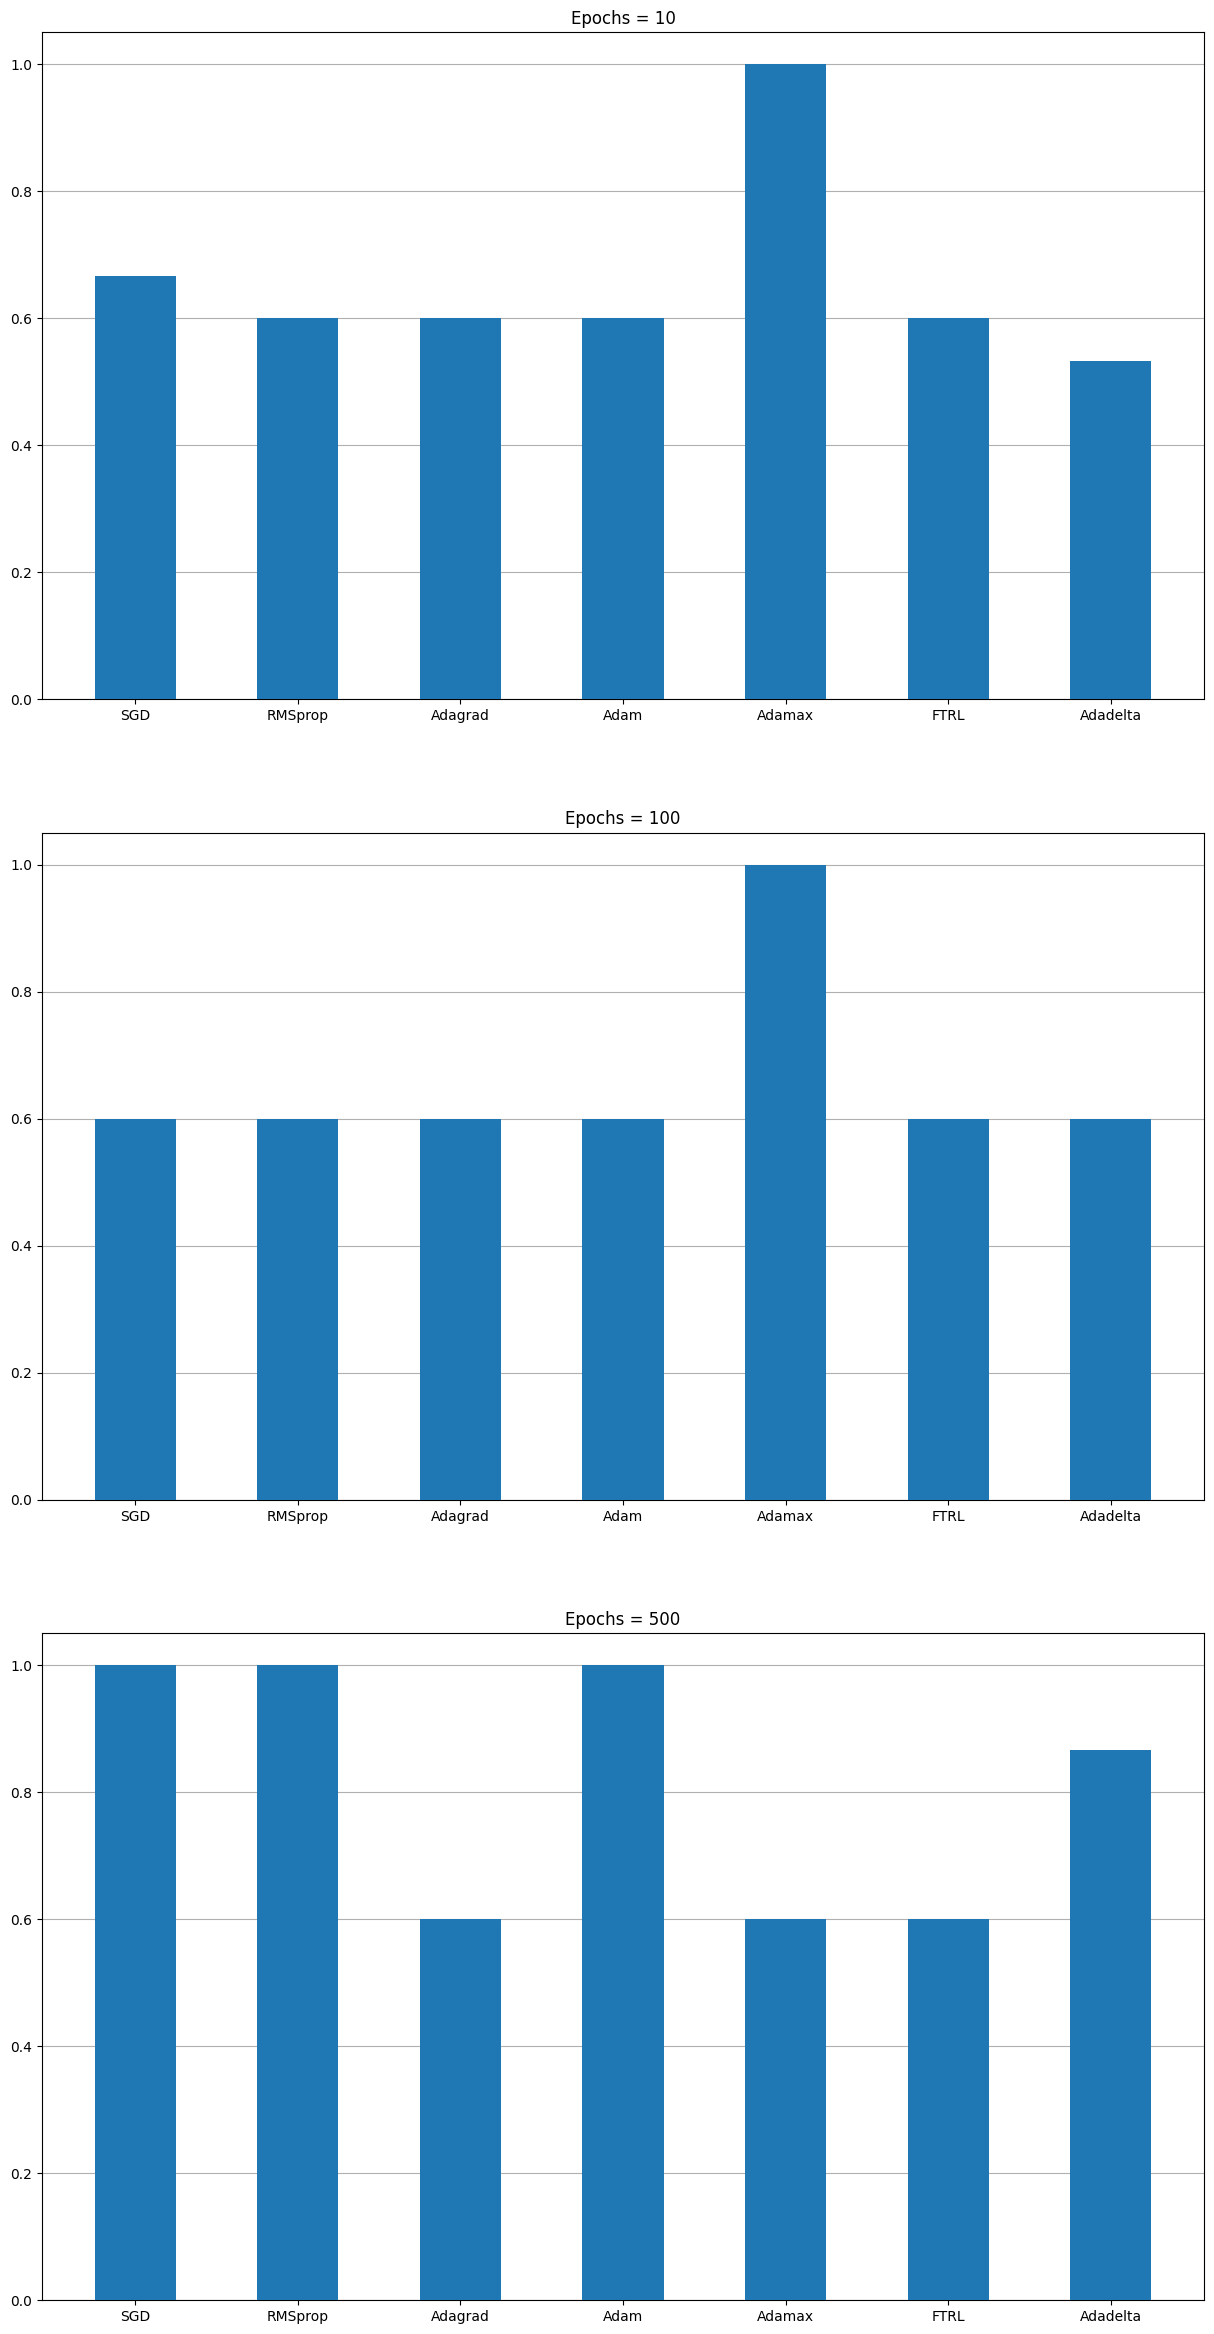

In [26]:
plot_bars_accuracies_for_every_epoch(optimizers, pred_accuracies_nn_0_optimizers, epochs_arr)

Наиболее точные результаты получаются с использованием функции активации SGD.

#### Выполним аналогичный анализ для датасета nn_1.csv

In [27]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, Y2, test_size=0.15)
X_train_2

array([[ 6.13008027e-01,  6.78335457e-01],
       [ 8.62207550e-01,  9.97832602e-02],
       [ 9.59706321e-01,  1.05135706e+00],
       [ 6.24160043e-01, -8.92555498e-02],
       [ 3.56516472e-02, -1.83123800e-02],
       [ 9.63668693e-01,  1.08764873e+00],
       [-4.44404418e-03,  9.94519305e-01],
       [ 1.31195243e+00,  8.87463094e-01],
       [-5.28473950e-03,  2.12142936e-01],
       [-4.75815129e-02,  1.35814584e-01],
       [ 8.88400436e-01,  6.54329780e-01],
       [ 9.12785304e-01,  1.06360364e-01],
       [ 5.59450980e-02, -3.15048145e-01],
       [ 9.29928019e-01,  1.07636738e+00],
       [-1.78221126e-01,  2.12998607e-01],
       [ 4.77767711e-01,  5.71274145e-01],
       [ 3.43664813e-02,  6.69297394e-01],
       [ 9.88285876e-01,  1.11614788e+00],
       [ 1.11596137e+00,  7.36601393e-01],
       [ 8.71607055e-01,  1.08640684e+00],
       [ 9.46555515e-01,  9.42328609e-01],
       [ 1.69744867e-01,  5.43962473e-01],
       [ 4.46097488e-01,  9.42497237e-01],
       [ 1.

In [28]:
pred_accuracies_nn_1_activations = calculate_accuraies_of_epochs_and_activations(X_train_2, X_test_2, y_train_2, y_test_2)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [01:00<00:00,  7.60s/it]


relu 0.5789473652839661 

exponential 0.42105263471603394 

elu 0.7105262875556946 

selu 0.5789473652839661 

tanh 0.6052631735801697 

softsign 0.42105263471603394 

softplus 0.28947368264198303 

sigmoid 0.5526315569877625 

relu 0.5789473652839661 

exponential 0.42105263471603394 

elu 0.34210526943206787 

selu 0.42105263471603394 

tanh 0.6052631735801697 

softsign 0.3684210479259491 

softplus 0.4736842215061188 

sigmoid 0.42105263471603394 

relu 0.7105262875556946 

exponential 0.5263158082962036 

elu 0.34210526943206787 

selu 0.6578947305679321 

tanh 0.6578947305679321 

softsign 0.6052631735801697 

softplus 0.4736842215061188 

sigmoid 0.42105263471603394 



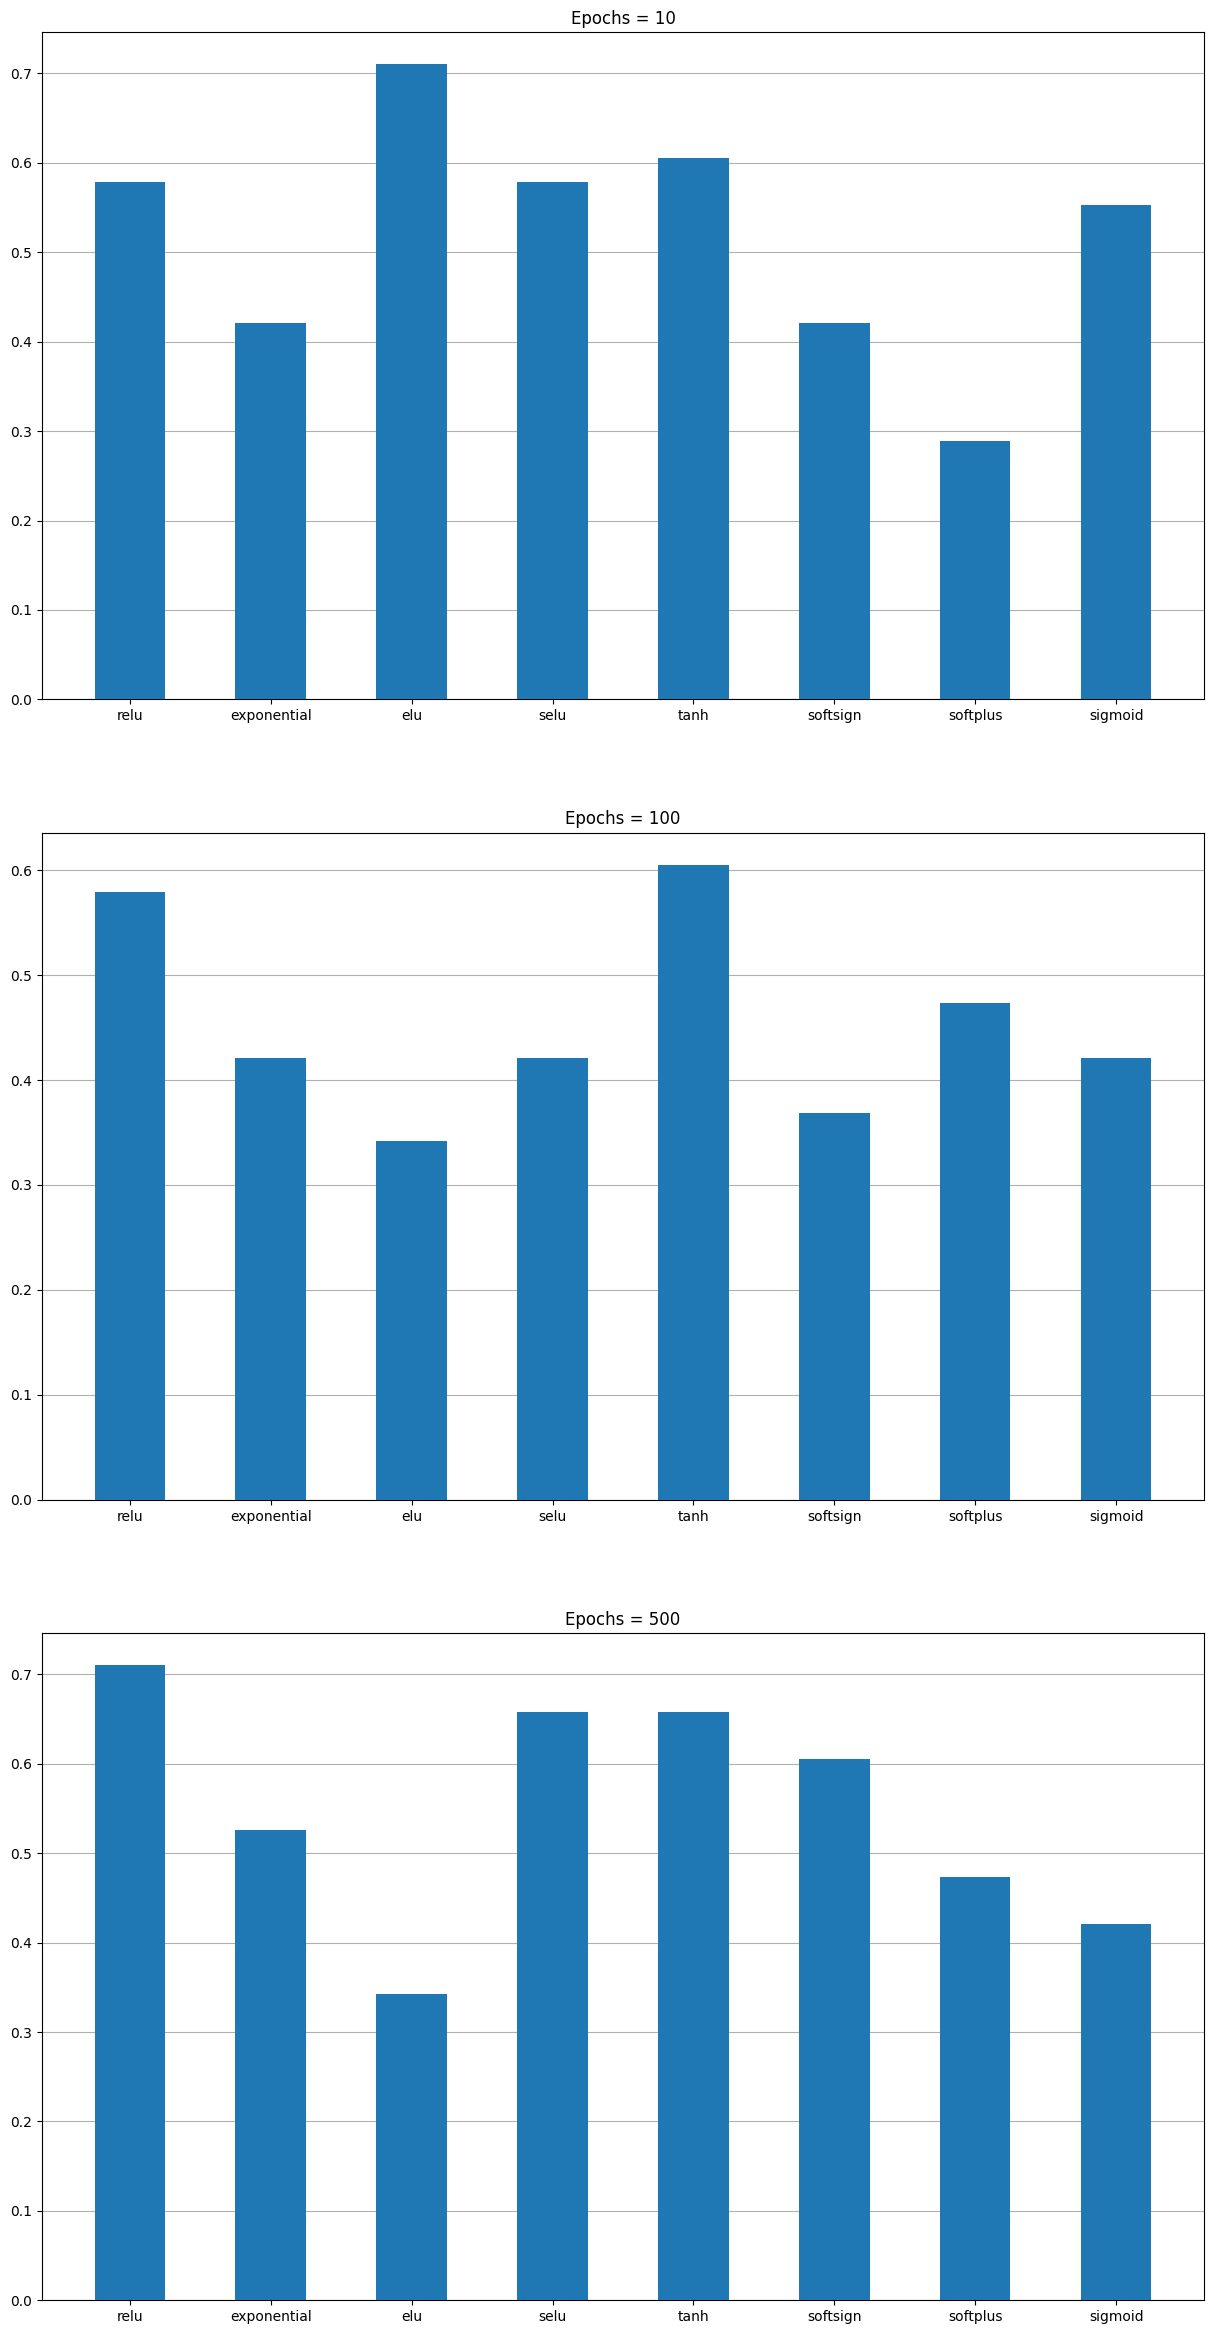

In [29]:
plot_bars_accuracies_for_every_epoch(activations, pred_accuracies_nn_1_activations, epochs_arr)

In [30]:
pred_accuracies_nn_1_optimizers = calculate_accuraies_of_epochs_and_optimizers(X_train_2, X_test_2, y_train_2, y_test_2,'selu')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:00<00:00,  8.62s/it]


SGD 0.4736842215061188 

RMSprop 0.34210526943206787 

Adagrad 0.34210526943206787 

Adam 0.6315789222717285 

Adamax 0.42105263471603394 

FTRL 0.42105263471603394 

Adadelta 0.7368420958518982 

SGD 0.42105263471603394 

RMSprop 0.5263158082962036 

Adagrad 0.42105263471603394 

Adam 0.6052631735801697 

Adamax 0.42105263471603394 

FTRL 0.42105263471603394 

Adadelta 0.3684210479259491 

SGD 0.6578947305679321 

RMSprop 0.34210526943206787 

Adagrad 0.34210526943206787 

Adam 0.44736841320991516 

Adamax 0.34210526943206787 

FTRL 0.6315789222717285 

Adadelta 0.34210526943206787 



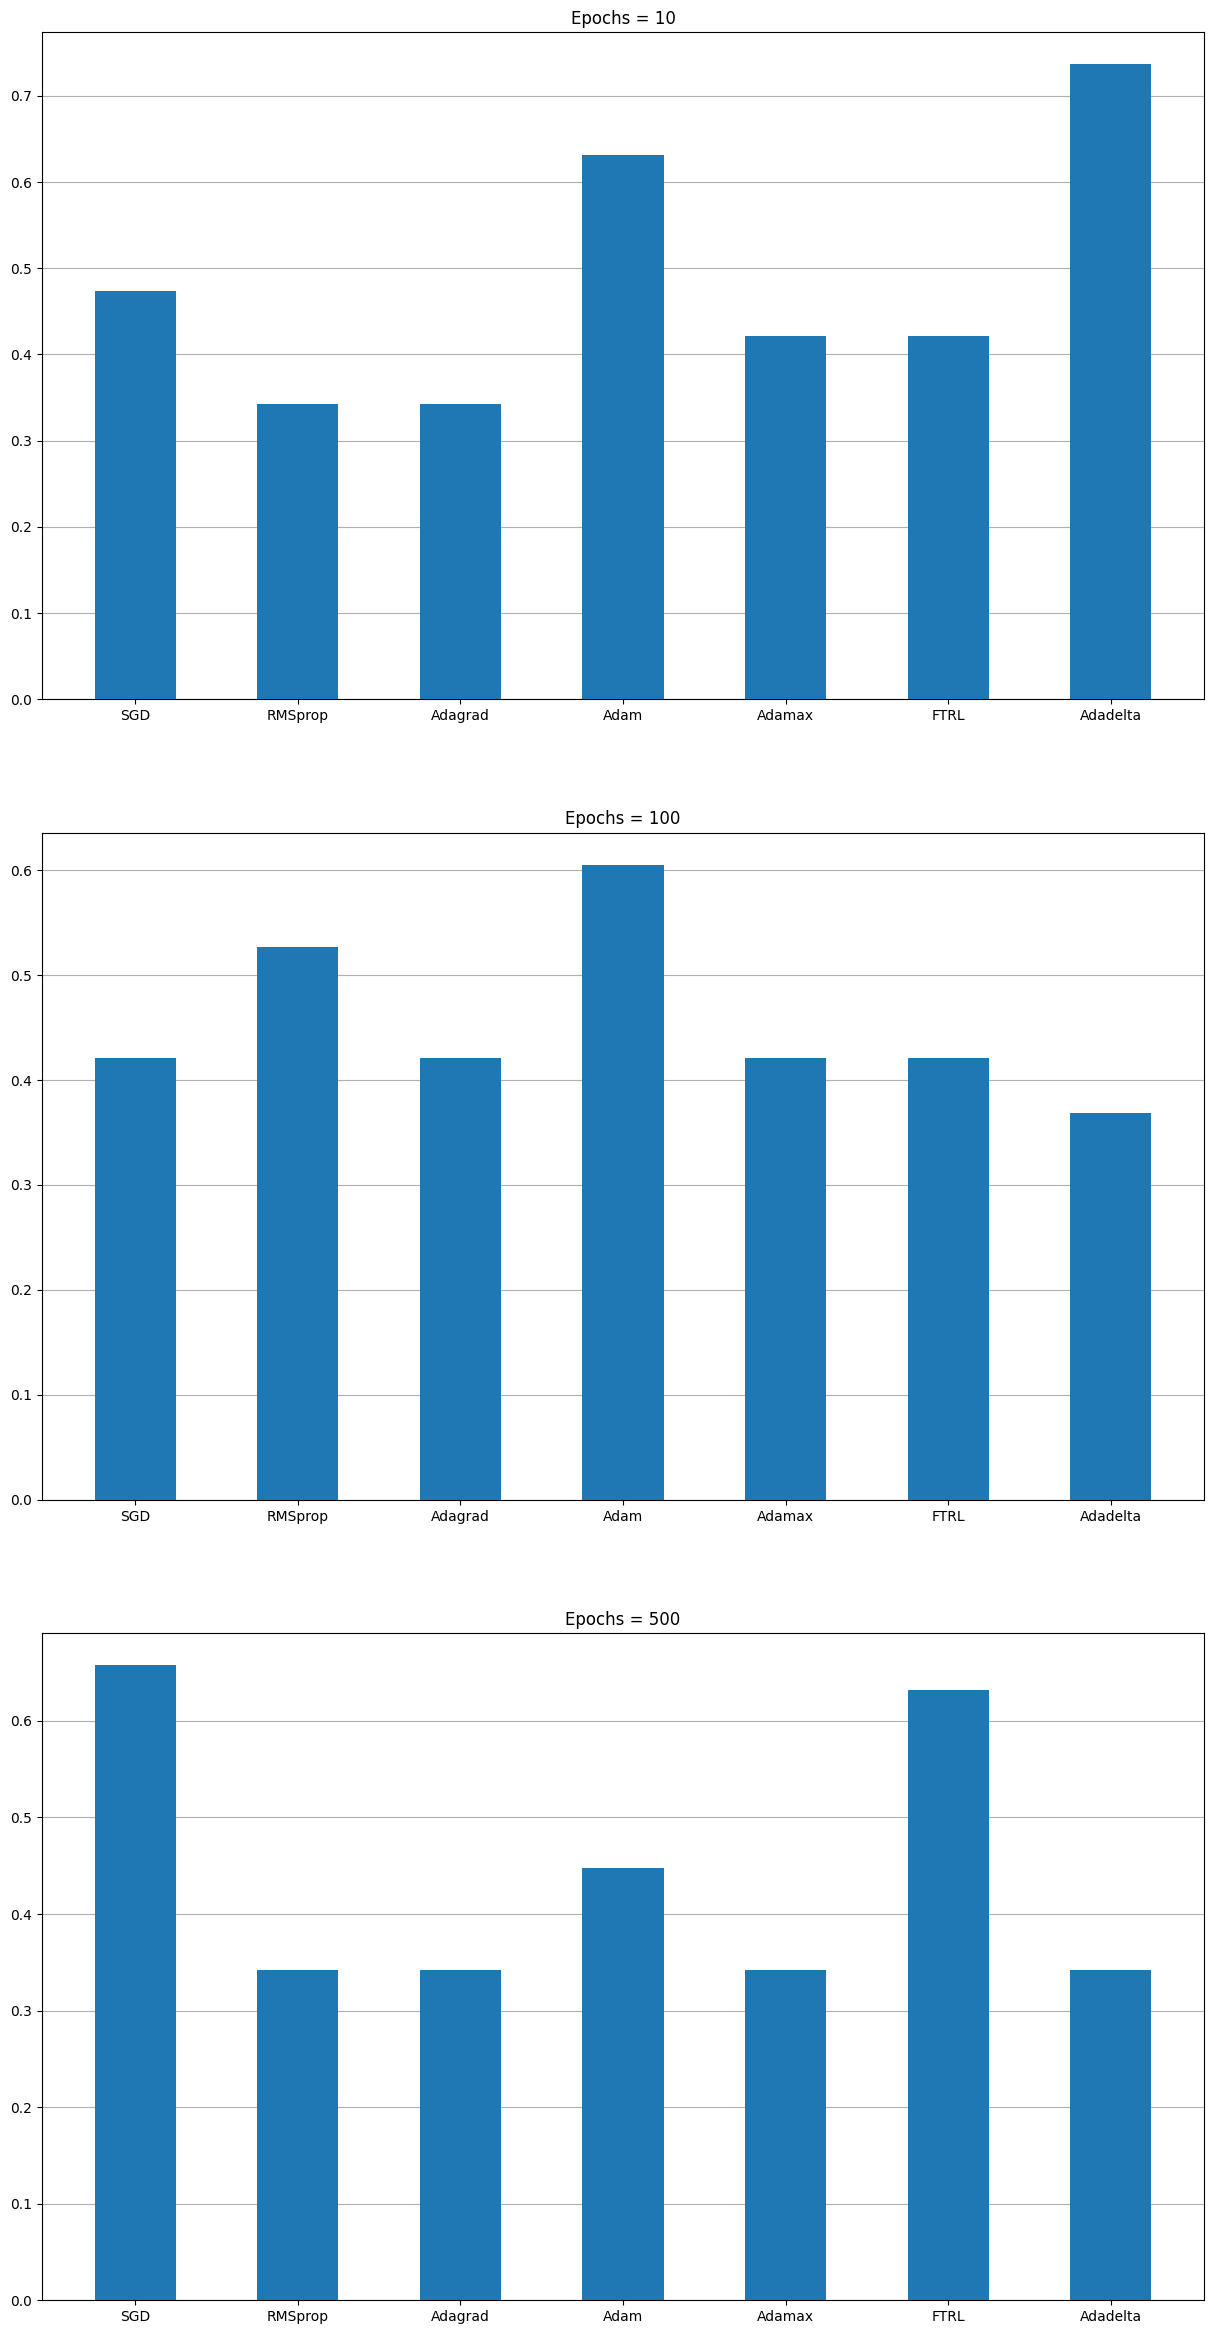

In [31]:
plot_bars_accuracies_for_every_epoch(optimizers, pred_accuracies_nn_1_optimizers, epochs_arr)

### Задание 2
 - Модифицируйте нейронную сеть из пункта 1 так, чтобы достичь минимальной ошибки на датасете nn_1.csv. Почему были сделаны именно такие изменения?

In [32]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [33]:
X2, Y2, nn1 = load_nn_data(1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.25)

In [46]:
num_layers = 1
model_task_2 = keras.Sequential([
    keras.layers.Input(2)
])

for i in range(num_layers):
    model_task_2.add(keras.layers.Dense(10, activation='relu'))
model_task_2.add(keras.layers.Dense(2, activation='softmax'))

# sparse_categorical_crossentropy
model_task_2.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_task_2.fit(X2_train, y2_train, epochs=400, verbose=0)

test_loss, test_acc = model_task_2.evaluate(X2_test,  y2_test, verbose=2)
print(test_loss, test_acc)
y_pred = model_task_2.predict(X2_test)

2/2 - 0s - loss: 0.2986 - accuracy: 0.9206 - 163ms/epoch - 82ms/step
0.2985650897026062 0.920634925365448
2/2 [==============================] - 0s 3ms/step


[[17  4]
 [ 1 41]]


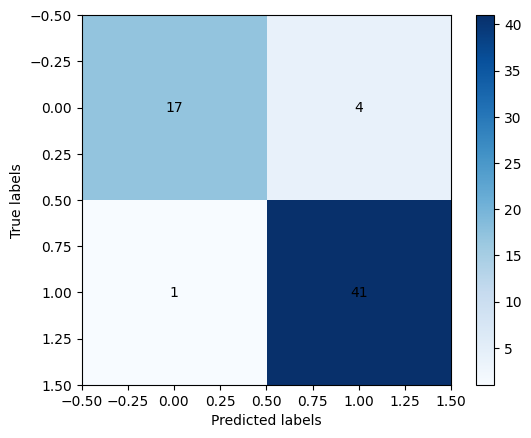

In [35]:
# y_true и y_pred - истинные и предсказанные метки классов соответственно
conf_mat = tf.math.confusion_matrix(y2_test, [np.argmax(i) for i in y_pred])
conf_mat = np.nan_to_num(conf_mat)
print(conf_mat)
# Отображение матрицы ошибок в виде графика плота
plt.imshow(conf_mat, cmap=plt.cm.Blues)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        plt.text(j, i, conf_mat[i, j], ha='center', va='center', color='black')

plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [36]:
num_layers = 10
model_task_2 = keras.Sequential([
    keras.layers.Input(2)
])

for i in range(num_layers):
    model_task_2.add(keras.layers.Dense(20, activation='relu'))
model_task_2.add(keras.layers.Dense(1, activation='sigmoid')) 

# sparse_categorical_crossentropy
model_task_2.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

model_task_2.fit(X2_train, y2_train, epochs=2000, verbose=0)

test_loss, test_acc = model_task_2.evaluate(X2_test,  y2_test, verbose=2)
print(test_loss, test_acc)
y_pred = model_task_2.predict(X2_test)



2/2 - 0s - loss: 0.1096 - accuracy: 0.9841 - 345ms/epoch - 173ms/step
0.109586201608181 0.9841269850730896
2/2 [==============================] - 0s 5ms/step


In [37]:
print(y2_test)
print(y_pred)
np.round(y_pred)
# print( [np.argmax(i) for i in y_pred])

[1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[9.9915755e-01]
 [7.4933640e-05]
 [9.9717605e-01]
 [1.0000000e+00]
 [3.0587250e-04]
 [9.9972391e-01]
 [1.7669477e-04]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.9968994e-01]
 [2.0822226e-03]
 [9.9973273e-01]
 [1.0000000e+00]
 [9.9972367e-01]
 [1.0000000e+00]
 [9.9973267e-01]
 [9.9971724e-01]
 [1.0000000e+00]
 [9.9974197e-01]
 [9.9892819e-01]
 [1.0000000e+00]
 [1.9267708e-04]
 [9.5613354e-01]
 [1.6811697e-04]
 [1.0000000e+00]
 [2.3003512e-03]
 [1.0000000e+00]
 [9.9974233e-01]
 [1.0000000e+00]
 [6.0829578e-05]
 [1.0000000e+00]
 [1.2668545e-04]
 [3.1937679e-04]
 [1.0000000e+00]
 [9.9972975e-01]
 [6.3328829e-05]
 [3.0448727e-04]
 [9.9966341e-01]
 [3.8491579e-04]
 [7.3638796e-05]
 [5.4418709e-04]
 [3.6176115e-03]
 [1.0000000e+00]
 [7.3811534e-05]
 [7.8922807e-05]
 [9.9862438e-01]
 [9.9999946e-01]
 [5.2218398e-05]
 [9.9966949e-01]
 [9.9974269e-01]
 [1.0000000e+00]
 [9.

array([[1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

[[20  1]
 [ 0 42]]


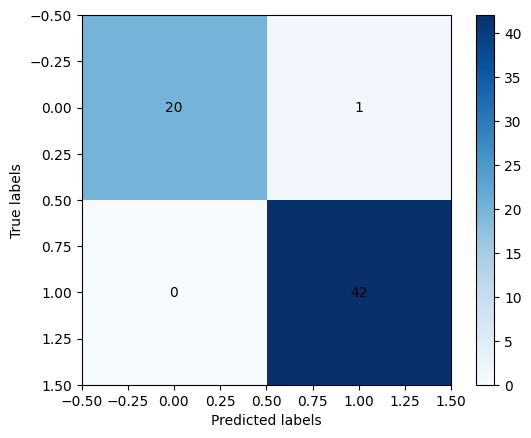

In [38]:
# y_true и y_pred - истинные и предсказанные метки классов соответственно
conf_mat = tf.math.confusion_matrix(y2_test, np.round(y_pred))
conf_mat = np.nan_to_num(conf_mat)
print(conf_mat)
# Отображение матрицы ошибок в виде графика плота
plt.imshow(conf_mat, cmap=plt.cm.Blues)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        plt.text(j, i, conf_mat[i, j], ha='center', va='center', color='black')

plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

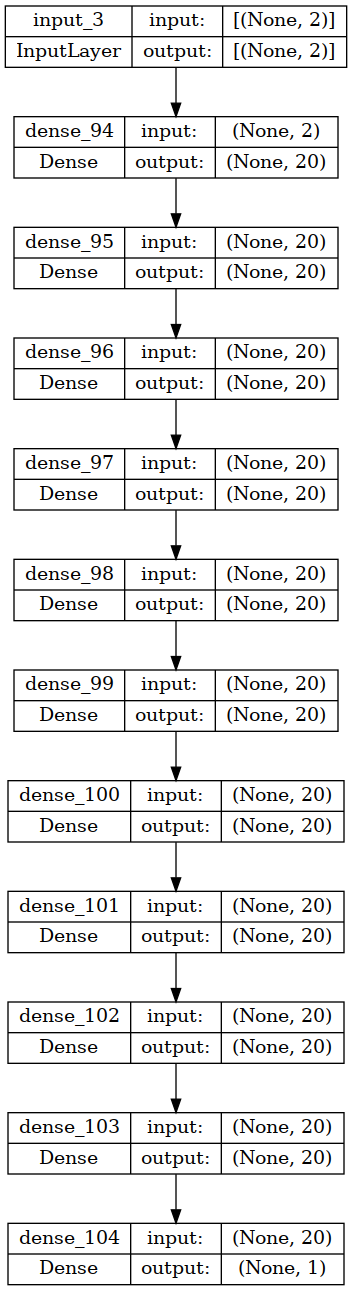

In [39]:
keras.utils.plot_model(model_task_2, show_shapes=True)

In [40]:
model_task_2.summary()

Model: "sequential_92"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            (None, 20)                60        
                                                                 
 dense_95 (Dense)            (None, 20)                420       
                                                                 
 dense_96 (Dense)            (None, 20)                420       
                                                                 
 dense_97 (Dense)            (None, 20)                420       
                                                                 
 dense_98 (Dense)            (None, 20)                420       
                                                                 
 dense_99 (Dense)            (None, 20)                420       
                                                                 
 dense_100 (Dense)           (None, 20)              

Вывод:

### Задание 3.

# MNIST

In [41]:
from tensorflow.keras.datasets import mnist

In [42]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [43]:
# нормализация данных (диапазон от 0 до 1)-- стандартизация
x_train, x_test = x_train / 255., x_test / 255.

In [44]:
# y_train = keras.utils.to_categorical(y_train, 10)
# y_test = keras.utils.to_categorical(y_test, 10)


In [45]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10


2023-05-14 23:13:03.579962: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.2603 - accuracy: 0.9254
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1155 - accuracy: 0.9652
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0782 - accuracy: 0.9767
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0576 - accuracy: 0.9824
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0450 - accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0358 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0279 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0222 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0178 - accuracy: 0.9947
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0162 - accurac

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_loss, test_acc)

y_pred = model.predict(x_test)
m = tf.math.confusion_matrix(y_test, [np.argmax(i) for i in y_pred])

m = np.nan_to_num(m)
print(conf_mat)
# Отображение матрицы ошибок в виде графика плота
plt.imshow(m, cmap=plt.cm.Blues)
for i in range(m.shape[0]):
    for j in range(m.shape[1]):
        plt.text(j, i, m[i, j], ha='center', va='center', color='black')

plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
n = 9
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print( np.argmax(res) )

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

Определим ошибочные варианты и выведим их изображения.

In [ ]:
# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])


In [ ]:
# Выделение неверных вариантов
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
p_false = pred[~mask]

print(x_false.shape)

In [ ]:

# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.title('Сеть определила как:' +str(p_false[i]))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.show()

